# Data cleaning

In [1]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


csv_path = "/content/drive/MyDrive/Data Analysis Task List/Data Set For Task/2) Stock Prices Data Set.csv"
df = pd.read_csv(csv_path)
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['symbol','date']).reset_index(drop=True)
dup_count = df.duplicated(subset=['symbol','date']).sum()
print(f'Duplicates: {dup_count}')
df.columns = df.columns.str.capitalize()
error_idx = df[df['High'] < df['Low']].index
df = df.drop(error_idx).reset_index(drop=True)
print(df.isna().sum())
print(df.info())
print(df.describe())
df

Mounted at /content/drive
Duplicates: 0
Symbol    0
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497460 entries, 0 to 497459
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Symbol  497460 non-null  object        
 1   Date    497460 non-null  datetime64[ns]
 2   Open    497460 non-null  float64       
 3   High    497460 non-null  float64       
 4   Low     497460 non-null  float64       
 5   Close   497460 non-null  float64       
 6   Volume  497460 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.6+ MB
None
                                Date           Open           High  \
count                         497460  497460.000000  497460.000000   
mean   2016-01-06 17:18:40.337715712      86.352400      87.132844   
min              2014-01-02 00:00:00       1.620000

,Symbol,Date,Open,High,Low,Close,Volume
0,A,2014-01-02,57.10,57.100,56.15,56.21,1916160
1,A,2014-01-03,56.39,57.345,56.26,56.92,1866651
2,A,2014-01-06,57.40,57.700,56.56,56.64,1777472
3,A,2014-01-07,56.95,57.630,56.93,57.45,1463208
4,A,2014-01-08,57.33,58.540,57.17,58.39,2659468
...,...,...,...,...,...,...,...
497455,ZTS,2017-12-22,72.30,72.370,71.79,71.99,1345683
497456,ZTS,2017-12-26,72.40,72.550,71.90,72.34,792134
497457,ZTS,2017-12-27,72.59,72.690,72.25,72.45,1159771
497458,ZTS,2017-12-28,72.49,72.600,72.14,72.39,710499


# scatter plot between highest price and lowest price

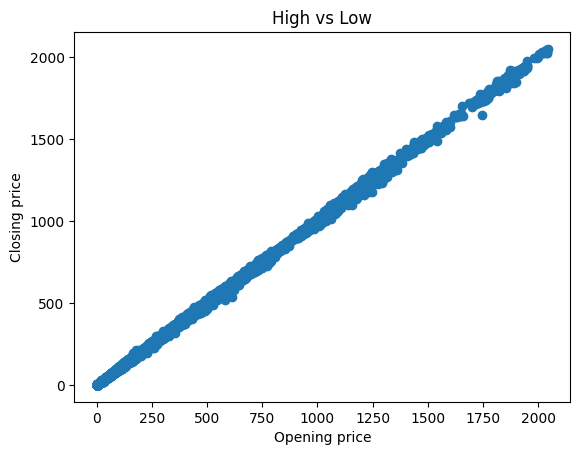

In [2]:
num_cols = ['Open','High','Low','Close']

plt.figure()
plt.scatter(df['Open'], df['Close'])
plt.title('High vs Low')
plt.xlabel('Opening price')
plt.ylabel('Closing price')
plt.savefig("High price vs low price correlation.jpg")
plt.show()


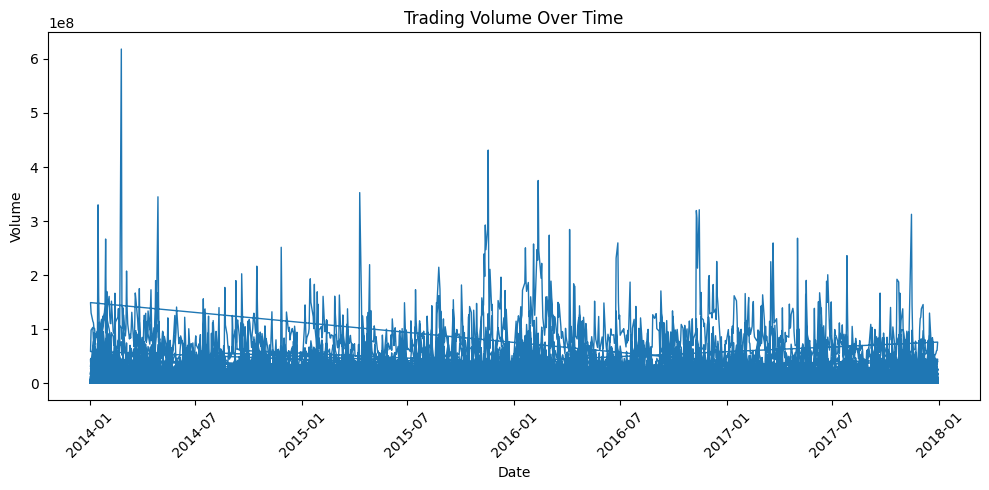

            Open      High       Low     Close    Volume
Open    1.000000  0.999941  0.999928  0.999876 -0.148725
High    0.999941  1.000000  0.999905  0.999938 -0.148345
Low     0.999928  0.999905  1.000000  0.999941 -0.149285
Close   0.999876  0.999938  0.999941  1.000000 -0.148840
Volume -0.148725 -0.148345 -0.149285 -0.148840  1.000000


In [3]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Volume'], linewidth=1)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("volume overtime(per 6 months).jpg")
plt.show()

print(corr)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = df[['Open']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)


slope = model.coef_[0]
intercept = model.intercept_

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

Intercept: 0.026101784267012818
Slope: 0.9998621899555149
R² Score: 0.9997364147165932
Mean Squared Error: 2.664465553392867


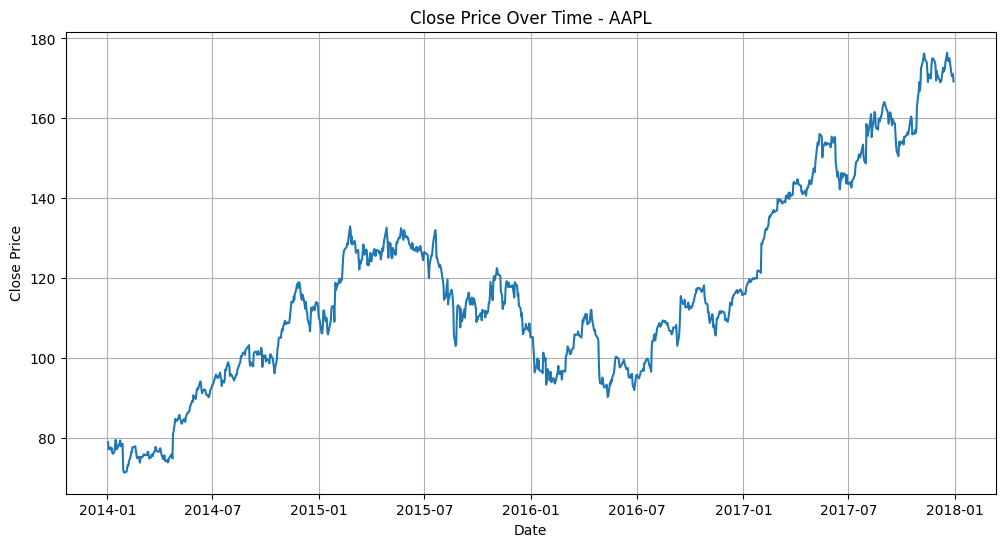

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(csv_path)
df.columns = df.columns.str.capitalize()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)


symbol_df = df[df['Symbol'] == 'AAPL']


plt.figure(figsize=(12, 6))
plt.plot(symbol_df.index, symbol_df['Close'])
plt.title('Close Price Over Time - AAPL')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.savefig(" time-series line plot of the closing price of a certain symbol.jpg")
plt.show()



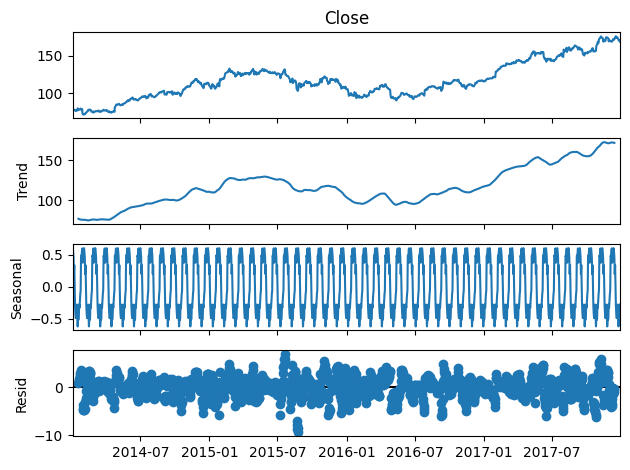

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


daily_close = symbol_df['Close'].resample('D').mean()


daily_close = daily_close.interpolate()

decomposition = seasonal_decompose(daily_close, model='additive', period=30)
decomposition.plot()
plt.tight_layout()
plt.savefig("Time-series decomposition.jpg")
plt.show()






# Moving average according to closing price attribute per 6 months

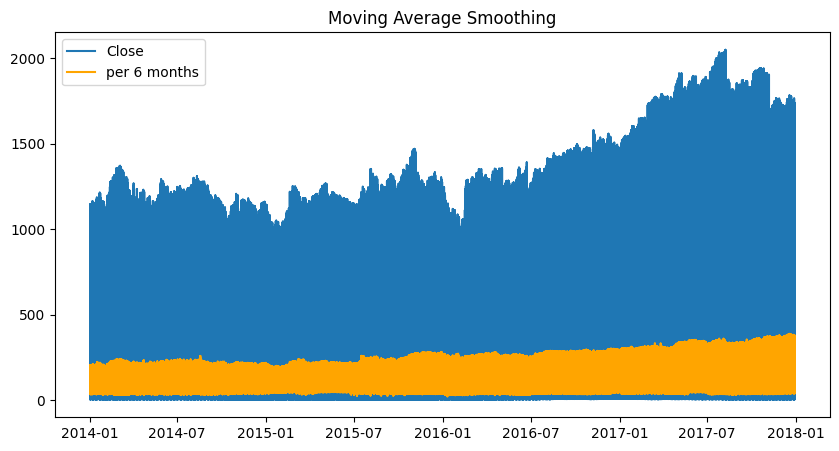

In [7]:
df['Moving_Avg'] = df['Close'].rolling(window=7).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Close')
plt.plot(df['Moving_Avg'], label='per 6 months', color='orange')
plt.legend()
plt.title('Moving Average Smoothing')
plt.savefig("Moving-average of attribute close.jpg")
plt.show()
